<a href="https://colab.research.google.com/github/offthetab/statistics_homework/blob/main/%D0%9F%D0%A0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2, ceil
import pandas as pd
from sklearn.metrics import r2_score

from scipy. stats import norm, chi2, f, t

In [ ]:
def intervals(data, marker):
  mean = np.mean(data[marker])
  std = np.std(data[marker])

  n = data.shape[0]
  m = round(1 + log2(n))  # кол-во интервалов

  min_ = min(data[marker])
  max_ = max(data[marker])

  h = (max_ - min_) / m  # шаг
  all_ints = [(min_ - 0.01) + (i * h) for i in range(m + 1)]
  all_ints[-1] += 0.01

  int1 = []
  for i, num in enumerate(all_ints):
    if(i != len(all_ints) - 1):
        int1.append([round(num, 3), round(all_ints[i+1], 3)])
    else:
        break

  # Абсолютные частоты
  absolute_freq = [0]*len(int1)
  for num in data[marker]:
    for index, interval in enumerate(int1):
      if (num >= interval[0] and num < interval[1]):
        absolute_freq[index] += 1
        break

  # Относительные частоты
  relative_freq = np.array(absolute_freq) / n

  int_centres = np.array(int1).mean(axis=1)
  return all_ints, int_centres, absolute_freq, relative_freq, h

In [ ]:
# генерация нормального распределения

k = 20
np.random.seed(111)
sample = [np.random.uniform(-1, 1, size=1000) for i in range(k)] # k равнораспределенных выборок


samplesum_1 = np.sum(sample[:1], axis=0)  # 1 выборка
samplesum_2 = np.sum(sample[:2], axis=0)  # 2 выборки
samplesum_5 = np.sum(sample[:5], axis=0)  # 5 выборкок

Text(0.5, 1.0, 'Распределение полученных сумм \nK=20')

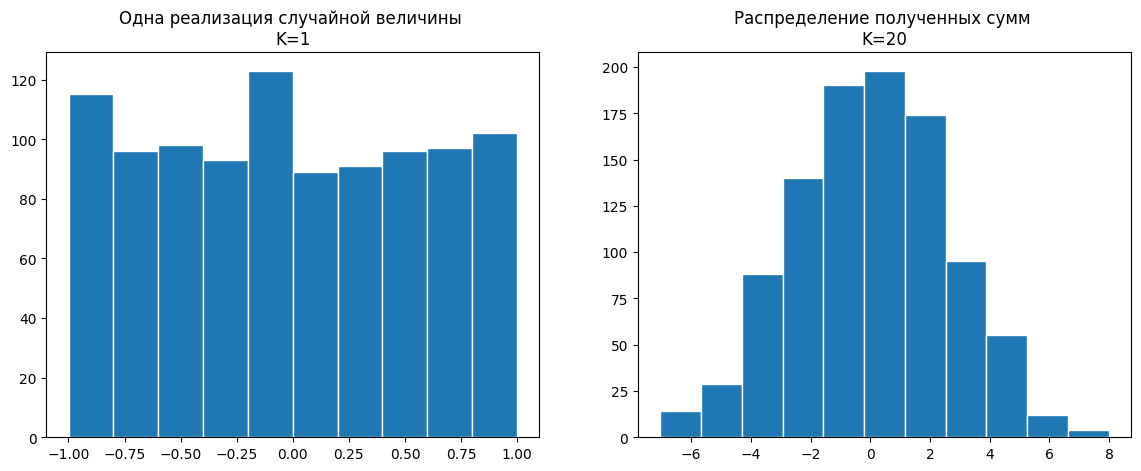

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].hist(samplesum_1, bins=10 ,edgecolor='w')
ax[0].set_title("Одна реализация случайной величины \nK=1")


# вывод суммы реализаций по ЦПТ
df_norm_all = pd.DataFrame()
df_norm_all['samplesum_all'] = np.sum(sample, axis=0)
ints, c, a_f, r_f, h = intervals(df_norm_all, 'samplesum_all')

ax[1].bar(c, height=a_f, width=h, edgecolor='white')
ax[1].set_title("Распределение полученных сумм \nK=20")

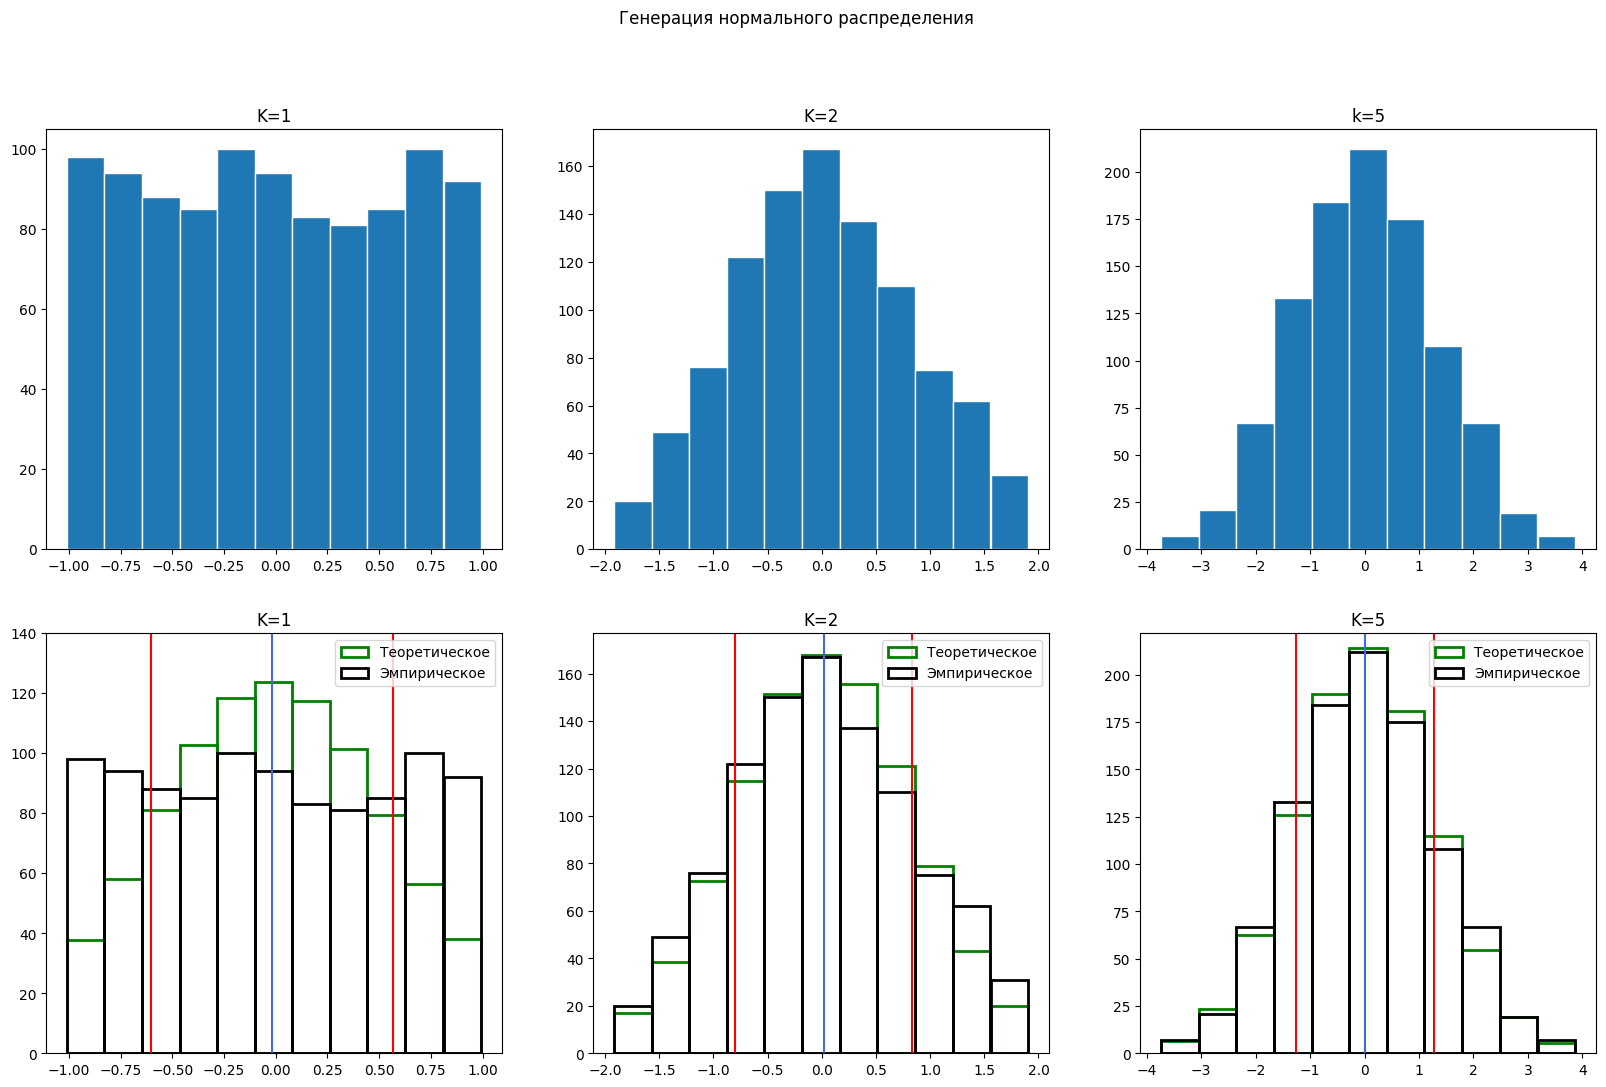

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))





# вывод k=1
df_norm_1 = pd.DataFrame()
df_norm_1['samplesum_1'] = samplesum_1
ints, c, a_f, r_f, h = intervals(df_norm_1, 'samplesum_1')

std_ = (np.sum((samplesum_1 - np.mean(samplesum_1)) ** 2) / (len(samplesum_2) - 1)) ** 0.5
mu = np.mean(samplesum_1)


# 1 график типа.
ax[0][0].bar(c, height=a_f, width=h, edgecolor='white')
ax[0][0].set_title("K=1")


# теоритические частоты интервалов гистограмма
heor_ints = []
for i, ints_ in enumerate(ints):
  if (ints_ == ints[-1]):
    break
  heor_ints.append(norm.cdf(ints[i+1], loc=mu, scale=std_) - norm.cdf(ints_, loc=mu, scale=std_))

# добавление частот и интервалов в df_norm_1
df_norm_1 = pd.DataFrame()
df_norm_1['interval_centre'] = c
df_norm_1['ni'] = a_f
df_norm_1['wi'] = r_f
df_norm_1['Pi'] = heor_ints
df_norm_1['nP'] = np.array(heor_ints) * 1000

# 4 график типа
ax[1][0].bar(c, height=np.array(heor_ints)*1000, width=h, edgecolor='green', fill=False, linewidth=2, label='Теоретическое')
ax[1][0].bar(c, height=a_f, width=h, edgecolor='black', fill=False, linewidth=2, label='Эмпирическое')

# линии средней и стандартного отклонения
ax[1][0].plot([mu] * 2, [0, max(a_f)+40], c='royalblue')
ax[1][0].plot([mu + std_] * 2, [0, max(a_f)+40], c='r')
ax[1][0].plot([mu - std_] * 2, [0, max(a_f)+40], c='r')


ax[1][0].set_ylim([0, max(a_f)+40])
ax[1][0].set_title("K=1")
ax[1][0].legend()









# вывод k=2
df_norm_2 = pd.DataFrame()
df_norm_2['samplesum_2'] = samplesum_2
ints, c, a_f, r_f, h = intervals(df_norm_2, 'samplesum_2')

std_ = (np.sum((samplesum_2 - np.mean(samplesum_2)) ** 2) / (len(samplesum_2) - 1)) ** 0.5
mu = np.mean(samplesum_2)


# 2 график типа.
ax[0][1].bar(c, height=a_f, width=h, edgecolor='white')
ax[0][1].set_title("K=2")


# теоритические частоты интервалов гистограмма
heor_ints = []
for i, ints_ in enumerate(ints):
  if (ints_ == ints[-1]):
    break
  heor_ints.append(norm.cdf(ints[i+1], loc=mu, scale=std_) - norm.cdf(ints_, loc=mu, scale=std_))

# добавление частот и интервалов в df_norm_2
df_norm_2 = pd.DataFrame()
df_norm_2['interval_centre'] = c
df_norm_2['ni'] = a_f
df_norm_2['wi'] = r_f
df_norm_2['Pi'] = heor_ints
df_norm_2['nP'] = np.array(heor_ints) * 1000

# 5 график типа
ax[1][1].bar(c, height=np.array(heor_ints)*1000, width=h, edgecolor='green', fill=False, linewidth=2, label='Теоретическое')
ax[1][1].bar(c, height=a_f, width=h, edgecolor='black', fill=False, linewidth=2, label='Эмпирическое')

# линии средней и стандартного отклонения
ax[1][1].plot([mu] * 2, [0, max(a_f)+10], c='royalblue')
ax[1][1].plot([mu + std_] * 2, [0, max(a_f)+10], c='r')
ax[1][1].plot([mu - std_] * 2, [0, max(a_f)+10], c='r')


ax[1][1].set_ylim([0, max(a_f)+10])
ax[1][1].set_title("K=2")
ax[1][1].legend()






# вывод k=5
df_norm_5 = pd.DataFrame()
df_norm_5['samplesum_5'] = samplesum_5
ints, c, a_f, r_f, h = intervals(df_norm_5, 'samplesum_5')

std_ = (np.sum((samplesum_5 - np.mean(samplesum_5)) ** 2) / (len(samplesum_5) - 1)) ** 0.5
mu = np.mean(samplesum_5)


# 3 график типа.
ax[0][2].bar(c, height=a_f, width=h, edgecolor='white')
ax[0][2].set_title('k=5')


# теоритические частоты интервалов гистограмма
heor_ints = []
for i, ints_ in enumerate(ints):
  if (ints_ == ints[-1]):
    break
  heor_ints.append(norm.cdf(ints[i+1], loc=mu, scale=std_) - norm.cdf(ints_, loc=mu, scale=std_))

# добавление частот и интервалов в df_norm_5
df_norm_5 = pd.DataFrame()
df_norm_5['interval_centre'] = c
df_norm_5['ni'] = a_f
df_norm_5['wi'] = r_f
df_norm_5['Pi'] = heor_ints
df_norm_5['nP'] = np.array(heor_ints) * 1000

# 6 график типа
ax[1][2].bar(c, height=np.array(heor_ints)*1000, width=h, edgecolor='green', fill=False, linewidth=2, label='Теоретическое')
ax[1][2].bar(c, height=a_f, width=h, edgecolor='black', fill=False, linewidth=2, label='Эмпирическое')

# линии средней и стандартного отклонения
ax[1][2].plot([mu] * 2, [0, max(a_f)+10], c='royalblue')
ax[1][2].plot([mu + std_] * 2, [0, max(a_f)+10], c='r')
ax[1][2].plot([mu - std_] * 2, [0, max(a_f)+10], c='r')


ax[1][2].set_ylim([0, max(a_f)+10])
ax[1][2].set_title("K=5")
ax[1][2].legend()



plt.suptitle('Генерация нормального распределения')
plt.show()





    interval_centre   ni     wi        Pi          nP
0           -0.9190   98  0.098  0.037843   37.843277
1           -0.7370   94  0.094  0.058150   58.149577
2           -0.5555   88  0.088  0.081150   81.150252
3           -0.3740   85  0.085  0.102854  102.853661
4           -0.1920  100  0.100  0.118396  118.395990
5           -0.0105   94  0.094  0.123778  123.777596
6            0.1710   83  0.083  0.117526  117.526298
7            0.3530   81  0.081  0.101348  101.348159
8            0.5345   85  0.085  0.079375   79.375043
9            0.7160  100  0.100  0.056460   56.459702
10           0.9030   92  0.092  0.037995   37.994692
Полученное значение критерия Пирсона: 256.3954164964568
Критическое значение: 15.50731305586545
Нулевая гипотеза отвергается, выборка не распределена по нормальному закону


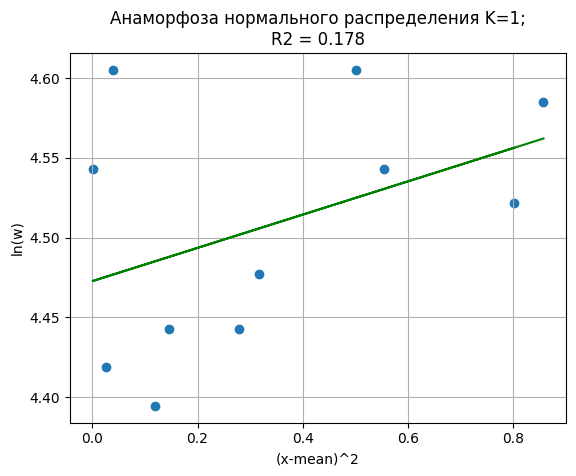

<Figure size 500x500 with 0 Axes>

In [ ]:
# Критерий согласия Пирсона k = 1

chi_ = np.sum((df_norm_1['ni'] - df_norm_1['nP']) ** 2 / df_norm_1['nP'])
chi_crit = chi2.ppf(1-0.05, df_norm_1.shape[0]-3)
print(df_norm_1)
print('Полученное значение критерия Пирсона:', chi_)
print("Критическое значение:", chi_crit)

if(chi_ < chi_crit):
  print("Нулевая гипотеза принимается, выборка распределена по нормальному закону")
else:
  print('Нулевая гипотеза отвергается, выборка не распределена по нормальному закону')

# Метод Анаморфоз для нормального распределения k = 1

# Расчет ln(w)
y = np.log(df_norm_1['ni'])
mae = (df_norm_1['interval_centre'] - mu) ** 2

# Расчет регрессионной прямой
X_new = np.c_[mae, np.ones(len(mae))]
W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

# Построение графика анаморфозы и регрессии
fig, ax = plt.subplots()
plt.figure(figsize=(5,5))
ax.scatter(x=mae ,y=y)
ax.plot(mae, X_new@W, color='g')
ax.set_title(f'Анаморфоза нормального распределения K=1;\nR2 = {r2_score(y, X_new@W).round(3)}')
ax.set_xlabel("(x-mean)^2")
ax.set_ylabel("ln(w)")
ax.grid()
plt.show()

    interval_centre   ni     wi        Pi          nP
0           -1.7445   20  0.020  0.017152   17.151633
1           -1.3970   49  0.049  0.038566   38.566484
2           -1.0495   76  0.076  0.072643   72.643204
3           -0.7025  122  0.122  0.114623  114.623358
4           -0.3555  150  0.150  0.151514  151.514380
5           -0.0085  167  0.167  0.167781  167.781070
6            0.3390  137  0.137  0.155648  155.647655
7            0.6865  110  0.110  0.120963  120.962611
8            1.0335   75  0.075  0.078752   78.752331
9            1.3805   62  0.062  0.042951   42.950729
10           1.7325   31  0.031  0.019964   19.964306
Полученное значение критерия Пирсона: 21.89952383785487
Критическое значение: 15.50731305586545
Нулевая гипотеза отвергается, выборка не распределена по нормальному закону


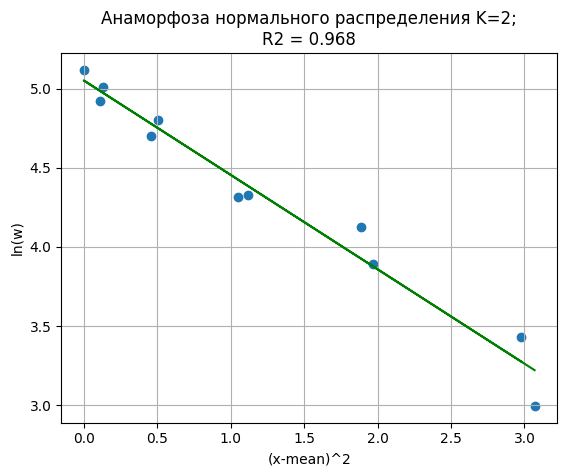

<Figure size 500x500 with 0 Axes>

In [ ]:
# Критерий согласия Пирсона k = 2

chi_ = np.sum((df_norm_2['ni'] - df_norm_2['nP']) ** 2 / df_norm_2['nP'])
chi_crit = chi2.ppf(1-0.05, df_norm_2.shape[0]-3)
print(df_norm_2)
print('Полученное значение критерия Пирсона:', chi_)
print("Критическое значение:", chi_crit)

if(chi_ < chi_crit):
  print("Нулевая гипотеза принимается, выборка распределена по нормальному закону")
else:
  print('Нулевая гипотеза отвергается, выборка не распределена по нормальному закону')

# Метод Анаморфоз для нормального распределения k = 2

# Расчет ln(w)
y = np.log(df_norm_2['ni'])
mae = (df_norm_2['interval_centre'] - mu) ** 2

# Расчет регрессионной прямой
X_new = np.c_[mae, np.ones(len(mae))]
W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

# Построение графика анаморфозы и регрессии
fig, ax = plt.subplots()
plt.figure(figsize=(5,5))
ax.scatter(x=mae ,y=y)
ax.plot(mae, X_new@W, color='g')
ax.set_title(f'Анаморфоза нормального распределения K=2;\nR2 = {r2_score(y, X_new@W).round(3)}')
ax.set_xlabel("(x-mean)^2")
ax.set_ylabel("ln(w)")
ax.grid()
plt.show()

    interval_centre   ni     wi        Pi          nP
0           -3.3940    7  0.007  0.006533    6.532660
1           -2.7025   21  0.021  0.023388   23.387540
2           -2.0110   67  0.067  0.062720   62.720116
3           -1.3195  133  0.133  0.126021  126.020599
4           -0.6280  184  0.184  0.189736  189.736463
5            0.0640  212  0.212  0.214078  214.078013
6            0.7555  175  0.175  0.181016  181.015814
7            1.4470  108  0.108  0.114701  114.701378
8            2.1385   67  0.067  0.054461   54.461152
9            2.8300   19  0.019  0.019373   19.373364
10           3.5270    7  0.007  0.005193    5.193188
Полученное значение критерия Пирсона: 5.263515651485234
Критическое значение: 15.50731305586545
Нулевая гипотеза принимается, выборка распределена по нормальному закону


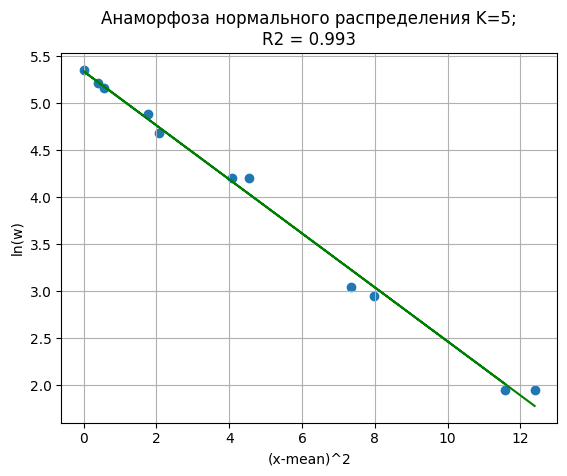

<Figure size 500x500 with 0 Axes>

In [ ]:
# Критерий согласия Пирсона k = 5

chi_ = np.sum((df_norm_5['ni'] - df_norm_5['nP']) ** 2 / df_norm_5['nP'])
chi_crit = chi2.ppf(1-0.05, df_norm_5.shape[0]-3)
print(df_norm_5)
print('Полученное значение критерия Пирсона:', chi_)
print("Критическое значение:", chi_crit)

if(chi_ < chi_crit):
  print("Нулевая гипотеза принимается, выборка распределена по нормальному закону")


# Метод Анаморфоз для нормального распределения k = 5

# Расчет ln(w)
y = np.log(df_norm_5['ni'])
mae = (df_norm_5['interval_centre'] - mu) ** 2

# Расчет регрессионной прямой
X_new = np.c_[mae, np.ones(len(mae))]
W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

# Построение графика анаморфозы и регрессии
fig, ax = plt.subplots()
plt.figure(figsize=(5,5))
ax.scatter(x=mae ,y=y)
ax.plot(mae, X_new@W, color='g')
ax.set_title(f'Анаморфоза нормального распределения K=5;\nR2 = {r2_score(y, X_new@W).round(3)}')
ax.set_xlabel("(x-mean)^2")
ax.set_ylabel("ln(w)")
ax.grid()
plt.show()

In [ ]:
# Генерация Кси распределения (Пирсона)

np.random.seed(5)
norm_dist = [np.random.normal(0,1,size = 1000) for i in range(1)] # задаем стандартное нормальное распределение

chi1 = np.sum(np.square(norm_dist), axis=0)


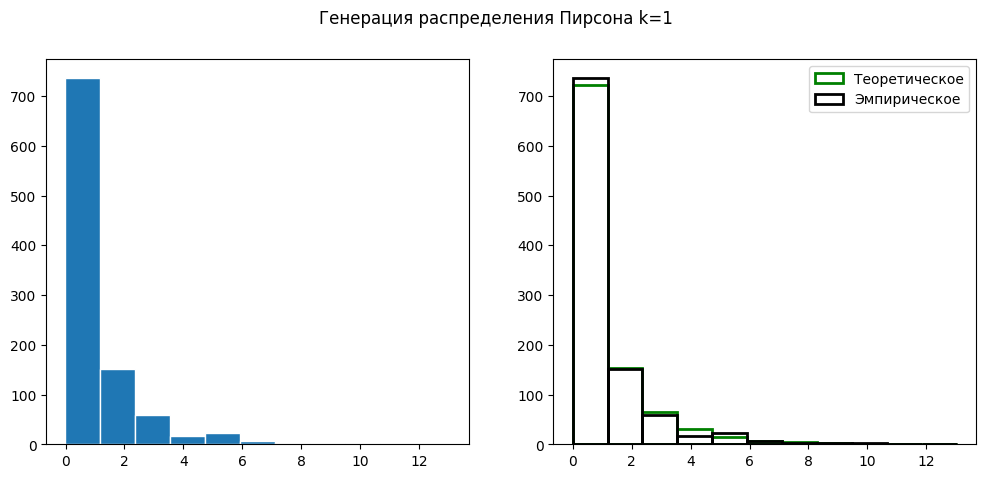

In [ ]:
# вывод распределение Пирсона k=1

chi1_ = pd.DataFrame()
chi1_['chi1'] = chi1
ints, c, a_f, r_f, h = intervals(chi1_, 'chi1')

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# 1 рисунок, просто гистограмма распределения
ax[0].bar(c, height=a_f, width=h, edgecolor='w')

# теоритические частоты интервалов гистограмма
heor_ints = []
for i, ints_ in enumerate(ints):
  if (ints_ == ints[-1]):
    break
  heor_ints.append(chi2.cdf(ints[i+1], df=1) - chi2.cdf(ints_, df=1))

ax[1].bar(c, height=np.array(heor_ints)*1000, width=h, edgecolor='green', fill=False, linewidth=2, label='Теоретическое')
ax[1].bar(c, height=a_f, width=h, edgecolor='black', fill=False, linewidth=2, label='Эмпирическое')
ax[1].legend()

plt.suptitle("Генерация распределения Пирсона k=1")
plt.show()

# добавление частот и интервалов в chi1_
chi1_ = pd.DataFrame()
chi1_['ni'] = a_f
chi1_['wi'] = r_f
chi1_['Pi'] = heor_ints
chi1_['nP'] = np.array(heor_ints) * 1000

In [ ]:
chi1_

,ni,wi,Pi,nP
0,57,0.057,0.055403,55.402870
1,202,0.202,0.203015,203.015083
2,264,0.264,0.264358,264.358069
3,219,0.219,0.214791,214.791033
4,127,0.127,0.134064,134.064477
5,72,0.072,0.070771,70.770981
6,37,0.037,0.033280,33.279670
7,12,0.012,0.014381,14.380897
8,5,0.005,0.005826,5.826258
9,4,0.004,0.002244,2.243553


In [ ]:
# Критерий согласия Пирсона

chi_ = np.sum((chi1_['ni'] - chi1_['nP']) ** 2 / chi1_['nP'])
chi_crit = chi2.ppf(1-0.05, chi1_.shape[0]-2)
print(chi1_)
print('Полученное значение критерия Пирсона:', chi_)
print("Критическое значение:", chi_crit)

if(chi_ < chi_crit):
  print("Нулевая гипотеза принимается, выборка имеет распределение Пирсона")

     ni     wi        Pi          nP
0    57  0.057  0.055403   55.402870
1   202  0.202  0.203015  203.015083
2   264  0.264  0.264358  264.358069
3   219  0.219  0.214791  214.791033
4   127  0.127  0.134064  134.064477
5    72  0.072  0.070771   70.770981
6    37  0.037  0.033280   33.279670
7    12  0.012  0.014381   14.380897
8     5  0.005  0.005826    5.826258
9     4  0.004  0.002244    2.243553
10    1  0.001  0.000831    0.830929
Полученное значение критерия Пирсона: 2.864435658137261
Критическое значение: 16.918977604620448
Нулевая гипотеза принимается, выборка имеет распределение Пирсона


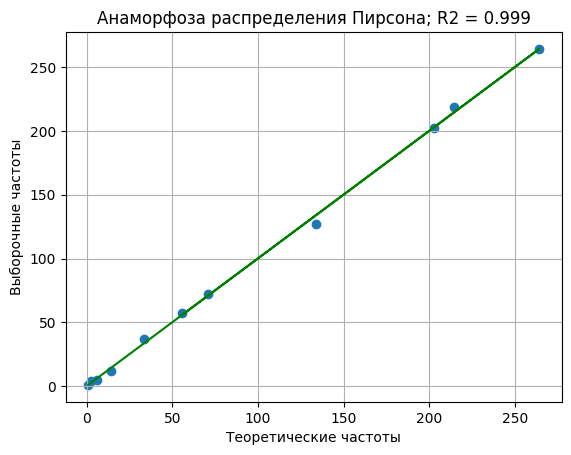

<Figure size 500x500 with 0 Axes>

In [ ]:
# Метод Анаморфоз для распределения Пирсона

y = chi1_['ni']
x = chi1_['nP']

# Расчет регрессионной прямой
X_new = np.c_[x, np.ones(len(x))]
W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

# Построение графика анаморфозы и регрессии
fig, ax = plt.subplots()
plt.figure(figsize=(5,5))
ax.scatter(x=chi1_['nP'] ,y=chi1_['ni'])
ax.plot(x, X_new@W, color='g')
ax.set_title(f'Анаморфоза распределения Пирсона; R2 = {r2_score(y, X_new@W).round(3)}')
ax.set_xlabel("Теоретические частоты")
ax.set_ylabel("Выборочные частоты")
ax.grid()
plt.show()

In [ ]:
# Генерация распределения Фишера
chi5_ = np.random.chisquare(df=5, size=1000)
chi10_ = np.random.chisquare(df=10, size=1000)

# Генерация распределения фишера
S = (chi5_ / 5) / (chi10_ / 10)

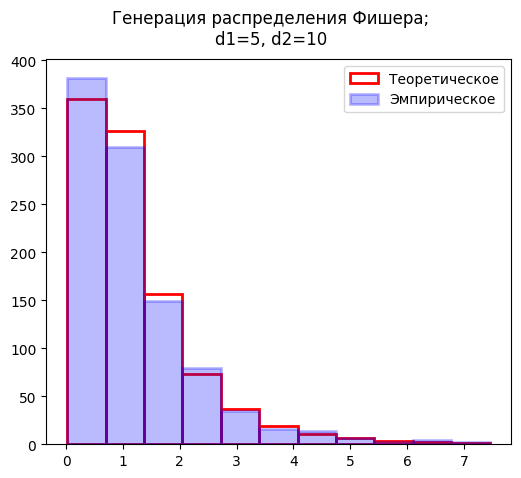

In [ ]:
# создадим 1 полотно для 2 графиков
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# запустим функция для расчета интервалов по правилу Стерджеса
fisher = pd.DataFrame()
fisher['S'] = S
ints, c, a_f, r_f, h = intervals(fisher, 'S')


# 1 рисунок отобразим теоретические часоты

# теоритические частоты интервалов гистограмма
heor_ints = []
for i, ints_ in enumerate(ints):
  if (ints_ == ints[-1]):
    break
  heor_ints.append(f.cdf(ints[i+1],  dfn=5, dfd=10) - f.cdf(ints_,  dfn=5, dfd=10))

# теоритическое
ax.bar(c, height=np.array(heor_ints)*1000, width=h, edgecolor='red', fill=False, linewidth=2, label='Теоретическое')

# эмепирическое
ax.bar(c, height=a_f, width=h, edgecolor='blue',color='blue', alpha=0.27 , linewidth=2, label='Эмпирическое')
ax.legend()




plt.suptitle('Генерация распределения Фишера;\nd1=5, d2=10')
plt.show()

# добавление частот и интервалов в fisher
fisher = pd.DataFrame()
fisher['ni'] = a_f
fisher['wi'] = r_f
fisher['Pi'] = heor_ints
fisher['nP'] = np.array(heor_ints) * 1000

In [ ]:
fisher

,ni,wi,Pi,nP
0,382,0.382,0.360097,360.096606
1,310,0.310,0.326341,326.341385
2,149,0.149,0.156469,156.468570
3,79,0.079,0.073440,73.440214
4,35,0.035,0.036309,36.309212
5,16,0.016,0.019062,19.062300
6,14,0.014,0.010579,10.578601
7,7,0.007,0.006164,6.163661
8,2,0.002,0.003746,3.746273
9,4,0.004,0.002362,2.361971


In [ ]:
# Критерий согласия Пирсона

chi_ = np.sum((fisher['ni'] - fisher['nP']) ** 2 / fisher['nP'])
chi_crit = chi2.ppf(1-0.05, fisher.shape[0]-3)
print(fisher)
print('Полученное значение критерия Пирсона:', chi_)
print("Критическое значение:", chi_crit)

if(chi_ < chi_crit):
  print("Нулевая гипотеза принимается, выборка имеет распределение Фишера")


     ni     wi        Pi          nP
0   382  0.382  0.360097  360.096606
1   310  0.310  0.326341  326.341385
2   149  0.149  0.156469  156.468570
3    79  0.079  0.073440   73.440214
4    35  0.035  0.036309   36.309212
5    16  0.016  0.019062   19.062300
6    14  0.014  0.010579   10.578601
7     7  0.007  0.006164    6.163661
8     2  0.002  0.003746    3.746273
9     4  0.004  0.002362    2.361971
10    2  0.002  0.001556    1.555840
Полученное значение критерия Пирсона: 6.763968421260857
Критическое значение: 15.50731305586545
Нулевая гипотеза принимается, выборка имеет распределение Фишера


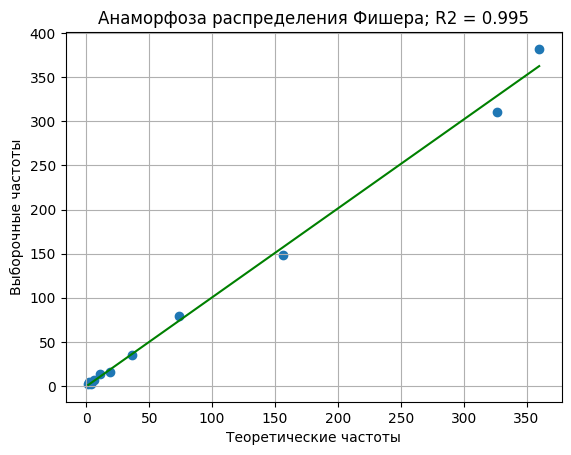

<Figure size 900x900 with 0 Axes>

In [ ]:
# Метод Анаморфоз для распределения Фишера

y = fisher['ni']
x = fisher['nP']

# Расчет регрессионной прямой
X_new = np.c_[x, np.ones(len(x))]
W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

# Построение графика анаморфозы и регрессии
fig, ax = plt.subplots()
plt.figure(figsize=(9,9))
ax.scatter(x=fisher['nP'] ,y=fisher['ni'])
ax.plot(x, X_new@W, color='g')
ax.set_title(f'Анаморфоза распределения Фишера; R2 = {r2_score(y, X_new@W).round(3)}')
ax.set_xlabel("Теоретические частоты")
ax.set_ylabel("Выборочные частоты")
ax.grid()
plt.show()

In [ ]:
# генерация Распределения Стьюдента

np.random.seed(111)

nr8 = np.array([np.random.normal(0, 1, size = 1000) for i in range(0, 8)])
nr0 = np.random.normal(0, 1, size = 1000)

T_3 = nr0 / (1 / 7 * np.sum(np.square(nr8), axis=0)) ** 0.5

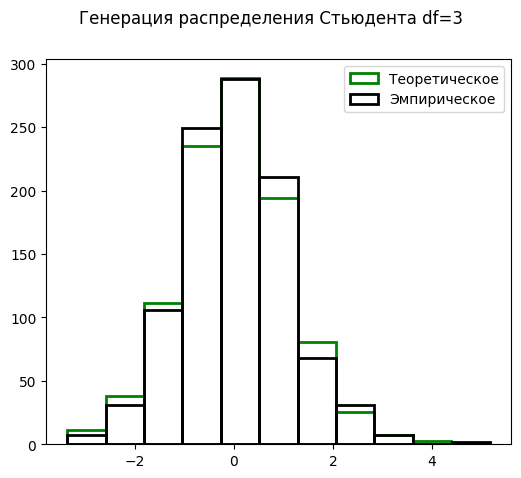

In [ ]:
# создадим 1 полотно для 2 графиков
fig, ax = plt.subplots(figsize=(6, 5))

# запустим функция для расчета интервалов по правилу Стерджеса
t_ = pd.DataFrame()
t_['T'] = T_3
ints, c, a_f, r_f, h = intervals(t_, 'T')


# 2 рисунок отобразим теоретические часоты
# теоритические частоты интервалов гистограмма
heor_ints = []
for i, ints_ in enumerate(ints):
  if (ints_ == ints[-1]):
    break
  heor_ints.append(t.cdf(ints[i+1],  df=8) - t.cdf(ints_,  df=8))

# теоритическое
ax.bar(c, height=np.array(heor_ints)*1000, width=h, edgecolor='green', fill=False, linewidth=2, label='Теоретическое')

# эмепирическое
ax.bar(c, height=a_f, width=h, edgecolor='black', fill=False , linewidth=2, label='Эмпирическое')
ax.legend()

plt.suptitle('Генерация распределения Стьюдента df=3')
plt.show()

# добавление частот и интервалов в fisher
t_ = pd.DataFrame()
t_['ni'] = a_f
t_['wi'] = r_f
t_['Pi'] = heor_ints
t_['nP'] = np.array(heor_ints) * 1000

In [ ]:
t_

,ni,wi,Pi,nP
0,1,0.001,0.000101,0.101445
1,0,0.000,0.000203,0.203232
2,1,0.001,0.000471,0.471346
3,1,0.001,0.001368,1.368195
4,6,0.006,0.005835,5.834943
5,62,0.062,0.053074,53.073583
6,631,0.631,0.651349,651.349082
7,270,0.270,0.266042,266.041950
8,22,0.022,0.017069,17.069421
9,5,0.005,0.002831,2.831489


In [ ]:
# Критерий согласия Пирсона

chi_ = np.sum((t_['ni'] - t_['nP']) ** 2 / t_['nP'])
chi_crit = chi2.ppf(1-0.05, t_.shape[0]-3)
print(t_)
print('Полученное значение критерия Пирсона:', chi_)
print("Критическое значение:", chi_crit)

if(chi_ < chi_crit):
  print("Нулевая гипотеза принимается, выборка имеет распределение Стьюдента")

     ni     wi        Pi          nP
0     1  0.001  0.000101    0.101445
1     0  0.000  0.000203    0.203232
2     1  0.001  0.000471    0.471346
3     1  0.001  0.001368    1.368195
4     6  0.006  0.005835    5.834943
5    62  0.062  0.053074   53.073583
6   631  0.631  0.651349  651.349082
7   270  0.270  0.266042  266.041950
8    22  0.022  0.017069   17.069421
9     5  0.005  0.002831    2.831489
10    0  0.000  0.000816    0.815689
Полученное значение критерия Пирсона: 14.955556040937866
Критическое значение: 15.50731305586545
Нулевая гипотеза принимается, выборка имеет распределение Стьюдента


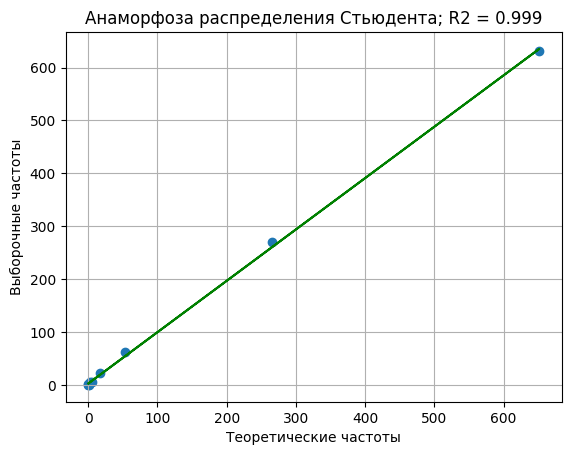

<Figure size 500x500 with 0 Axes>

In [ ]:
# Метод Анаморфоз для распределения Стьюдента

y = t_['ni']
x = t_['nP']

# Расчет регрессионной прямой
X_new = np.c_[x, np.ones(len(x))]
W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

# Построение графика анаморфозы и регрессии
fig, ax = plt.subplots()
plt.figure(figsize=(5,5))
ax.scatter(x=t_['nP'] ,y=t_['ni'])
ax.plot(x, X_new@W, color='g')
ax.set_title(f'Анаморфоза распределения Стьюдента; R2 = {r2_score(y, X_new@W).round(3)}')
ax.set_xlabel("Теоретические частоты")
ax.set_ylabel("Выборочные частоты")
ax.grid()
plt.show()